## Script to convert the HONDA fluxfiles into the DN format it expects

---------


HONDA FLUX
5 columns, full flux has x sections with different angles
Enu(GeV)   NuMu       NuMubar    NuE        NuEbar  (m^2 sec sr GeV)^-1
 


DN
 9 columns with
 Enu nue numu nutau nuebar numubar nutaubar, *according to DN arxiv paper..*



In [19]:
import numpy as np
import matplotlib.pyplot as plt

In [11]:
orca_max = np.genfromtxt("orca_test_max_single.dat",unpack=True,skip_header=2,usecols=np.arange(0,5))


In [15]:
#print(orca_max)
#print(np.shape(orca_max))

In [13]:
Enu,numu, numubar, nue , nuebar = orca_max

In [21]:
print(numu)

[6.7373e+03 6.1268e+03 5.5303e+03 4.9500e+03 4.3823e+03 3.8303e+03
 3.2983e+03 2.8093e+03 2.3618e+03 1.9622e+03 1.6150e+03 1.3143e+03
 1.0602e+03 8.4685e+02 6.7022e+02 5.2592e+02 4.0898e+02 3.1535e+02
 2.4203e+02 1.8474e+02 1.3982e+02 1.0548e+02 7.9392e+01 5.9339e+01
 4.4200e+01 3.2808e+01 2.4152e+01 1.7735e+01 1.3021e+01 9.5087e+00
 6.8914e+00 5.0103e+00 3.6359e+00 2.6239e+00 1.8904e+00 1.3617e+00
 9.7672e-01 6.9971e-01 5.0145e-01 3.5796e-01 2.5568e-01 1.8221e-01
 1.2969e-01 9.2389e-02 6.5702e-02 4.6750e-02 3.3264e-02 2.3563e-02
 1.6695e-02 1.1767e-02 8.3799e-03 5.9196e-03 4.1790e-03 2.9461e-03
 2.0739e-03 1.4590e-03 1.0265e-03 7.2021e-04 5.0532e-04 3.5429e-04
 2.4794e-04 1.7334e-04 1.2112e-04 8.4596e-05 5.9072e-05 4.1267e-05
 2.8812e-05 2.0045e-05 1.3923e-05 9.6697e-06 6.7298e-06 4.6450e-06
 3.2125e-06 2.2197e-06 1.5301e-06 1.0594e-06 7.2171e-07 4.9481e-07
 3.3862e-07 2.3158e-07 1.5896e-07 1.0650e-07 7.2140e-08 4.8778e-08
 3.2840e-08 2.2154e-08 1.4841e-08 9.9356e-09 6.6476e-09 4.4238

In [17]:
units =  1/10000 * 365*3600*24 #to convert /m^2 -> /cm^2 and from /s to total in a year
  # would also be able to increase to 5 or 10 years, thats fine

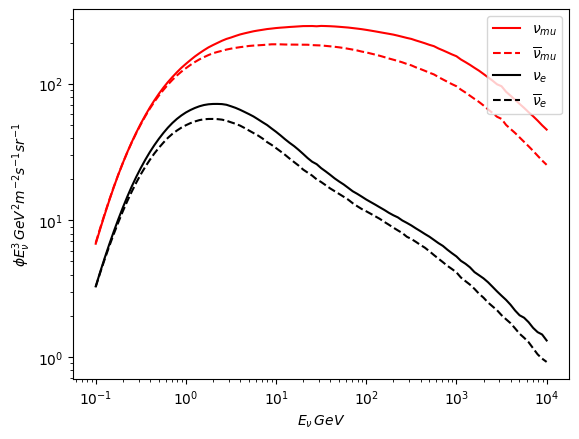

In [36]:
plt.plot(Enu,numu *Enu**3,color='r', label=r'$\nu_{mu}$')
plt.plot(Enu,numubar *Enu**3, color='r',ls='dashed', label=r'$\overline{\nu}_{mu}$')
plt.plot(Enu,nue *Enu**3,color='k', label=r'$\nu_{e}$')
plt.plot(Enu,nuebar *Enu**3, color='k', ls='dashed',label=r'$\overline{\nu}_{e}$')
plt.xscale('log')
plt.yscale('log')
plt.ylabel(r'$\phi E_{\nu}^3\, GeV^2 m^{-2} s^{-1} sr^{-1} $')
plt.xlabel(r'$E_{\nu} \,GeV $')
plt.legend(loc='upper right')
plt.show()

Units are right below converted to nus/GeV/cm^2/sr in a certain altitude bin and averaged over azimuthal
So we either combine all the tables to get an altitude average and then times $4\pi$
or we calc the total flux in the bin and take that into account for the rotation

In [18]:
np.savetxt("../KM3NET_ORCA_max.dat",np.array([Enu,nue*units,numu*units,numu*units*0,nuebar*units,numubar*units,numu*units*0]).T,
                    header='nus/cm^2/GeV')